**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  # Import SimpleImputer

**Load the Dataset and Data Preprocessing**

In [2]:
# Load the dataset (download from Kaggle and provide the file path)
data = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data preprocessing
# Handle missing values, encode categorical variables, and perform feature engineering
# You can extend this section according to your dataset's characteristics

# Handling Missing Values
# Use SimpleImputer to replace missing values with the mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')
data = data.drop('customerID', axis=1)  # Drop the 'customerID' column
data = pd.get_dummies(data, drop_first=True)  # One-hot encoding for remaining categorical variables

**Encode the 'Churn' column**

In [3]:
# Find the 'Churn' column using a case-insensitive search
churn_column = next((col for col in data.columns if 'Churn' in col), None)

if churn_column:
    # Encode the 'Churn' column (Yes/No) to 1 and 0
    data[churn_column] = data[churn_column].apply(lambda x: 1 if x == 'Yes' else 0)
else:
    print("Column 'Churn' not found in the dataset.")

**Split Data into Training and Testing Sets**

In [4]:
# Split the data into training and testing sets
X = data.drop(churn_column, axis=1)
y = data[churn_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature Scaling**

In [5]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Selection and Training**

In [6]:
# Model selection and training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Make Predictions**

In [7]:
# Make predictions
y_pred = model.predict(X_test)

**Model Evaluation**

In [8]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Confusion Matrix:
[[1409]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1409

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



**Feature Importance Analysis**

In [9]:
# Feature Importance Analysis
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]

print("Feature Importance:")
for i in range(len(sorted_idx)):
    print(f"{feature_names[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]}")

Streaming output truncated to the last 5000 lines.
TotalCharges_309.1: 0.0
TotalCharges_309.25: 0.0
TotalCharges_309.35: 0.0
TotalCharges_3066.45: 0.0
TotalCharges_3062.45: 0.0
TotalCharges_306.6: 0.0
TotalCharges_306.05: 0.0
TotalCharges_3035.8: 0.0
TotalCharges_3036.75: 0.0
TotalCharges_3038.55: 0.0
TotalCharges_304.6: 0.0
TotalCharges_3042.25: 0.0
TotalCharges_3043.6: 0.0
TotalCharges_3043.7: 0.0
TotalCharges_3045.75: 0.0
TotalCharges_3046.05: 0.0
TotalCharges_3046.15: 0.0
TotalCharges_3046.4: 0.0
TotalCharges_3047.15: 0.0
TotalCharges_305.1: 0.0
TotalCharges_305.55: 0.0
TotalCharges_305.95: 0.0
TotalCharges_3050.15: 0.0
TotalCharges_3053: 0.0
TotalCharges_3055.5: 0.0
TotalCharges_3058.15: 0.0
TotalCharges_3058.3: 0.0
TotalCharges_3058.65: 0.0
TotalCharges_309.4: 0.0
TotalCharges_3090.65: 0.0
TotalCharges_3147.15: 0.0
TotalCharges_3131.8: 0.0
TotalCharges_3122.4: 0.0
TotalCharges_3124.5: 0.0
TotalCharges_3126.45: 0.0
TotalCharges_3126.85: 0.0
TotalCharges_3128.8: 0.0
TotalCharges_31

**Feature Importance Visualization**

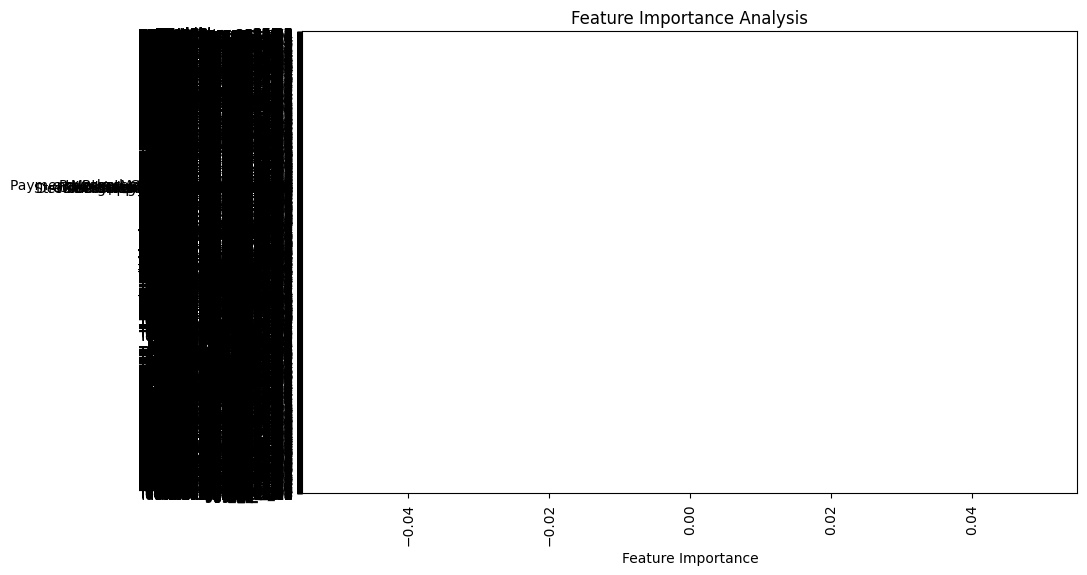

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=feature_names[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Analysis")
plt.xticks(rotation=90)
plt.show()

**Feature Importance Bar Plot (Top 10 Features)**

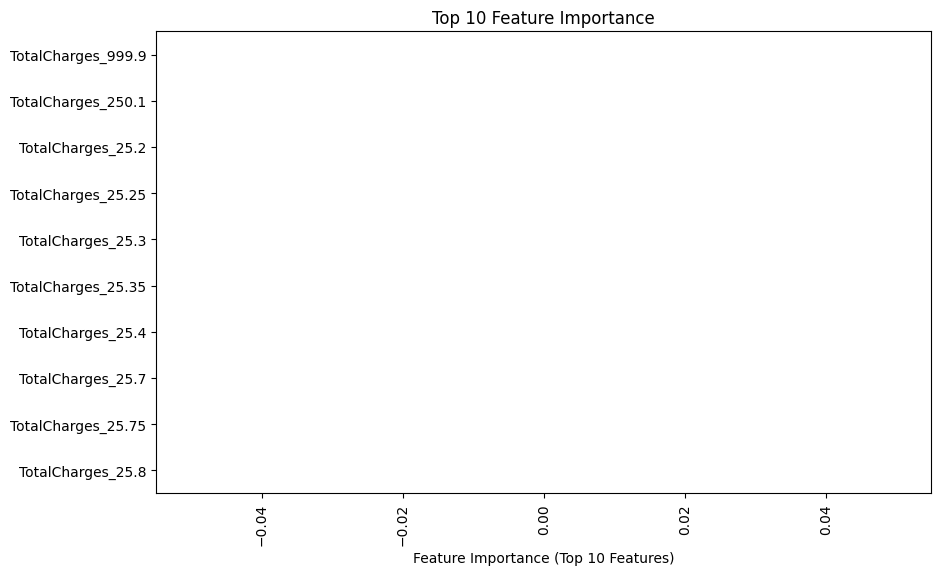

TotalCharges_999.9: 0.0
TotalCharges_250.1: 0.0
TotalCharges_25.2: 0.0
TotalCharges_25.25: 0.0
TotalCharges_25.3: 0.0
TotalCharges_25.35: 0.0
TotalCharges_25.4: 0.0
TotalCharges_25.7: 0.0
TotalCharges_25.75: 0.0
TotalCharges_25.8: 0.0


In [10]:
# Feature Importance Bar Plot (Top N Features)
# Display the top 10 most important features and print their importance values
top_n = 10
plt.figure(figsize=(10, 6))
top_feature_importance = feature_importance[sorted_idx][:top_n]
top_feature_names = feature_names[sorted_idx][:top_n]
sns.barplot(x=top_feature_importance, y=top_feature_names)
plt.xlabel("Feature Importance (Top 10 Features)")
plt.title("Top 10 Feature Importance")
plt.xticks(rotation=90)
plt.show()

# Print feature importance values for the top 10 features
for i in range(top_n):
    print(f"{top_feature_names[i]}: {top_feature_importance[i]}")


**Correlation Heatmap**

In [ ]:
# Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Distribution of Target Variable**

In [11]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(data['Churn'])
plt.xlabel("Churn")
plt.title("Distribution of Churn")
plt.show()

KeyError: ignored

<Figure size 600x400 with 0 Axes>

**Distribution of Numerical Features**

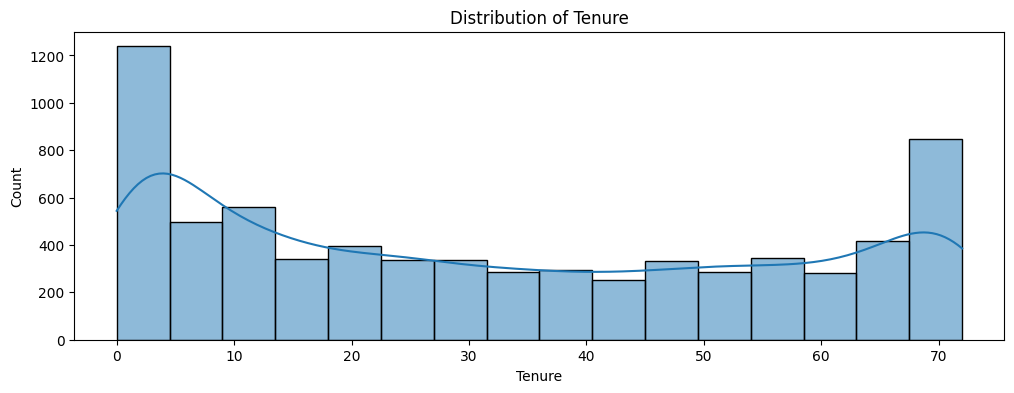

In [12]:
# Distribution of Numerical Features
plt.figure(figsize=(12, 4))
sns.histplot(data['tenure'], kde=True)
plt.xlabel("Tenure")
plt.title("Distribution of Tenure")
plt.show()

**Count Plots for Categorical Features**

In [13]:
# Count Plots for Categorical Features
categorical_features = ['gender', 'InternetService', 'Contract']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[feature])
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=90)
    plt.show()

KeyError: ignored

<Figure size 1000x400 with 0 Axes>

**Pair Plots**

In [14]:
# Pair Plots (Note: This can be computationally intensive if you have many features)
sns.pairplot(data, hue='Churn', plot_kws={'alpha': 0.5})
plt.show()

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7874fb2ddea0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 1.64e+06x1.64e+06 with 2571 Axes>

**Violin PLots**

In [15]:
# Violin Plots
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=data)
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.title("Distribution of Monthly Charges by Churn")
plt.show()

ValueError: ignored

<Figure size 800x600 with 0 Axes>